## OBJECTIVE:

Exploratory Data Analysis using the Haberman Survival Dataset. 

Haberman Survival Dataset
Source:https://www.kaggle.com/gilsousa/habermans-survival-data-set

This dataset is an excerpt from a study that was conducted at the 
University of Chicago's Billings Hospital during 1958 and 1970 
based on the survival of patients who had underwent
surgery for breast cancer.

The dataset has 4 attributes:
- Age
- Year
- Nodes
- survival Status

Our main aim is to perform an analysis on the Haberman Cancer Survival Dataset
and classify the data based on the following sections:
- Number of Points
- Number of Features
- Number of Classes
- Data Points per Class.

We will be performing two types of Analysis on the dataset:
Univariate and Bivariate.

Univariate analysis is done using PDF,CDF,Boxplot and Violin plots
to understand which features are useful 
towards classification.

Bivariate analysis is done using scatter plots and pair plots
to see if combinations of features that are useful in classification. 



In [59]:
#reading the data points 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman = pd.read_csv("D:\Downloads\haberman.csv")
print('Data-points')
print (haberman.shape[0]) 

Data-points
306


### OBSERVATION:
#### Here we are trying to print the data points/no. of instances in the dataset.

In [60]:
#reading the number of attributes/features/variables
print('Features')
print (haberman.shape[1]) 

Features
4


### OBSERVATIONS:
#### We're counting the four attributes:
- Age: Age of the patient during the surgery
- Year: The year of surgery
- Nodes: Number of positive axillary nodes detected
- Status: Survival status(1,2)
   - 1 = the patient survived 5 years or longer
   - 2 = the patient died within 5 year

In [61]:
print('Columns')
print (haberman.columns) #printing all the columns of the table present in the dataset.

Columns
Index(['age', 'year', 'nodes', 'status'], dtype='object')


### OBSERVATIONS:
#### Here we have 4 classes/attributes to determine the patient's condition based on 4 features:
#### patient's age,the year of surgery,no. of positive axillary nodes detected,and status of the patient
#### (1:patient survived 5 years or longer,2:patient died within 5 years) 

In [62]:
#data-points in the class status
print('Data point per each class')
print (haberman["status"].value_counts()) 

Data point per each class
1    225
2     81
Name: status, dtype: int64


### OBSERVATIONS:
#### Counting the number of values in the class status.
#### Survival status =1,where there are 225 patients who survived 5 years or longer
#### Survival status=2,where there are 81 patients who died within 5 years
#### In total 306 data points.




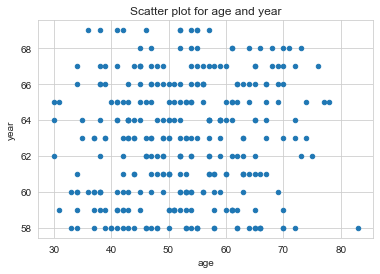

In [63]:
# Scatter plot for age and year
haberman.plot(kind='scatter', x='age', y='year')
plt.title('Scatter plot for age and year')
plt.show()

### OBSERVATIONS:
#### Here we're plotting a graph with age as x-axis and year as y-axis.
#### Age  of the patient differs from 30 to 80 and during the year 1958 to 1968.

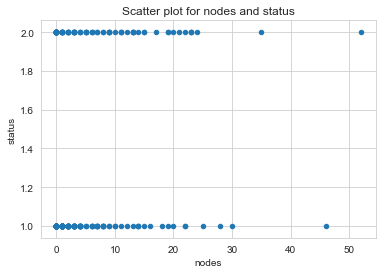

In [64]:
# Scatter plot for nodes and status

haberman.plot(kind='scatter', x='nodes', y='status');
plt.title('Scatter plot for nodes and status')
plt.show()

### OBSERVATIONS:
#### Gives the count of the number of positive axillary nodes of the patient based on the Status of the patient.
#### i.e., 1 = the patient survived 5 years or longer
####       2 = the patient died within 5 year

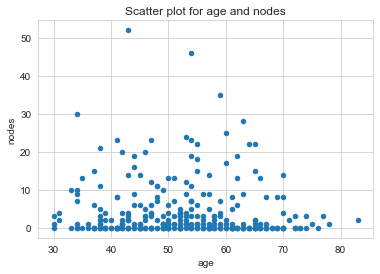

In [65]:
# Scatter plot for age and nodes

haberman.plot(kind='scatter', x='age', y='nodes');
plt.title('Scatter plot for age and nodes')
plt.show()

### OBSERVATION:
#### Determines the age of the patient during the surgery based on the number of positive axillary nodes of the patient.

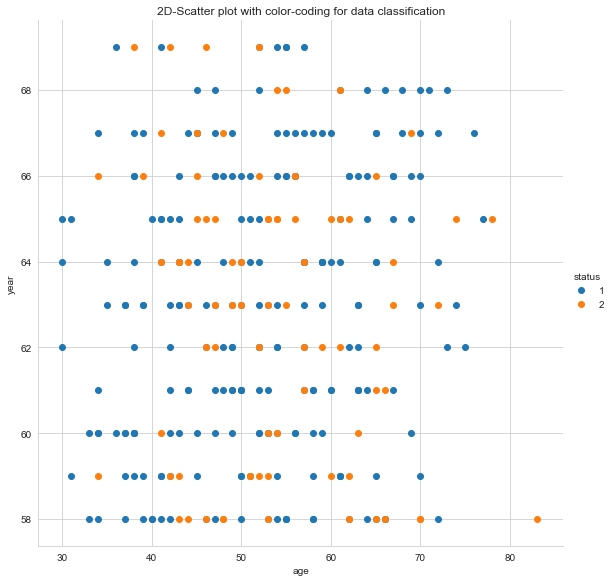

In [66]:
#2D-Scatter plot with color-coding to classify/seggregate data based on age and time
# survived,not survived? 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('2D-Scatter plot with color-coding for data classification')
plt.show();

### OBSERVATIONS:
#### Color Blue indicates patients that survived for 5 years or longer.
#### Color Orange indicates paients that died within 5 years. 
#### not easily separated.


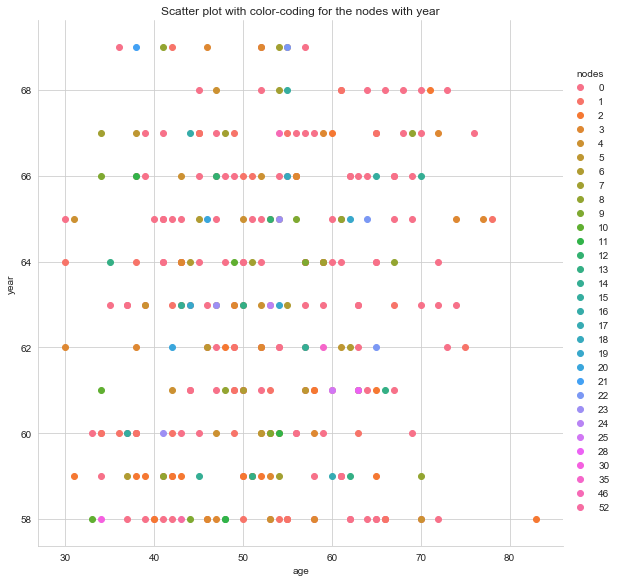

In [67]:
#Scatter plot with color-coding based on the Positive axillary nodes with year of surgery
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="nodes", size=8) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('Scatter plot with color-coding for the nodes with year')
plt.show();

### OBSERVATIONS:
#### coloring the points based on nodes and plotting a scatter plot on a 2D Plane with age as x-axis and year as y-axis
#### detecting the number of positive axillary nodes based on the year of surgery.

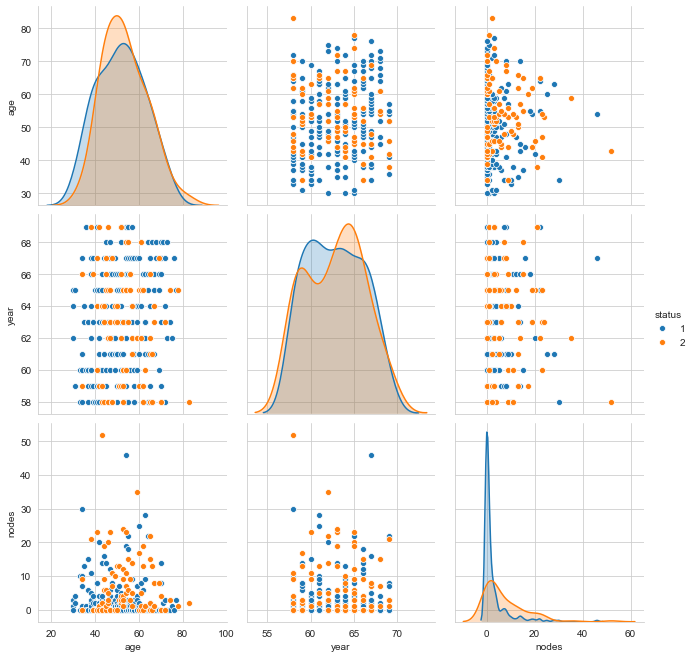

In [68]:
#Pairwise scatter plot
#Pair-Plot
#diagonal elements are PDFs

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3)
plt.show()


### OBSERVATIONS:
#### detecting the status of the patient on the basis of age,year,nodes.
#### we have some overlapping results where we have a lot of patients who survived 5 years or longer and also who died within 5 years.
#### hard to read

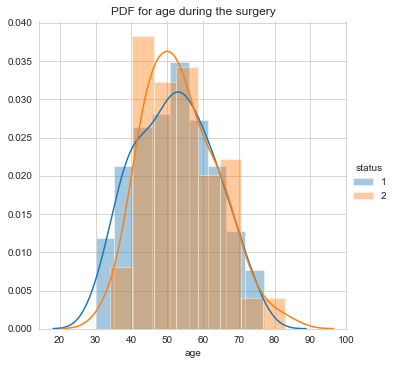

In [69]:
#PDF age
#histogram
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF for age during the surgery')
plt.show();

### OBSERVATIONS:
#### Plotting PDF to detect the status of the patients based on the age of the patient.
#### The y-axis represents the number of points existing in the window.
#### The blue line indicates the histogram of status 1 and the smooth line is called the PDF.
#### The orange line indicates the histogram of status 2 and the smooth line is called the PDF.

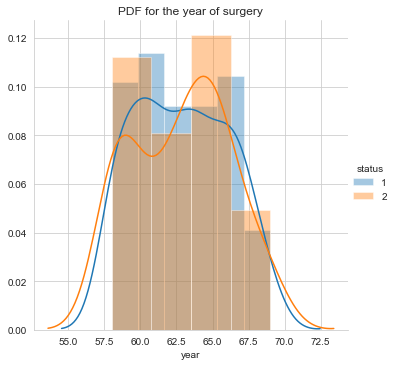

In [70]:
#PDF year using histogram
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('PDF for the year of surgery')
plt.show();

### OBSERVATIONS:
#### PDF to determine the status of the patient based on the year of surgery.
#### Gives the approximate deaths from year to year.

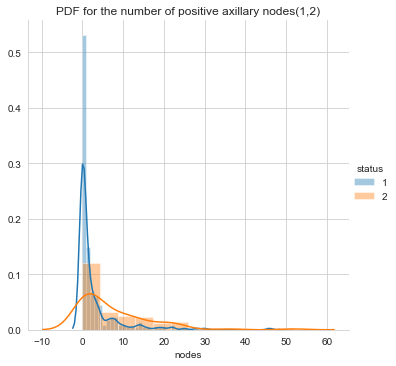

In [71]:
#PDF nodes using histogram.
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('PDF for the number of positive axillary nodes(1,2)')
plt.show();

### OBSERVATIONS:
#### PDF to determine the status of the patient based on the number of positive axillary nodes. 
#### Gives an approximate number of deaths on the number of nodes of the patients.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


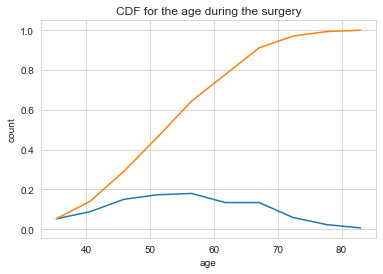

In [72]:
#CDF of age

counts, bin_edges = np.histogram(haberman['age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel('count')
plt.title('CDF for the age during the surgery')
plt.show();

### OBSERVATIONS:
#### The blue line(PDF)indicates the Cumulative sum where we can visually see the age of patient based on a certain count.
#### The orange line(CDF)indicates the probability i.e., the approximate number of deaths based on the PDF.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


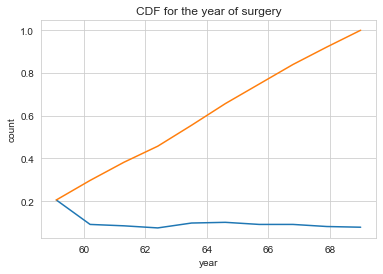

In [73]:
#CDF of year

counts, bin_edges = np.histogram(haberman['year'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year')
plt.ylabel('count')
plt.title('CDF for the year of surgery')
plt.show();

### OBSERVATIONS:
#### Gives the age of the patient based on the year of surgery.
#### The blue line(PDF) is the visual representation of the year of surgery based on a certain count.
#### The orange line(CDF)indicates the probability i.e., the approximate number of deaths based on the PDF.

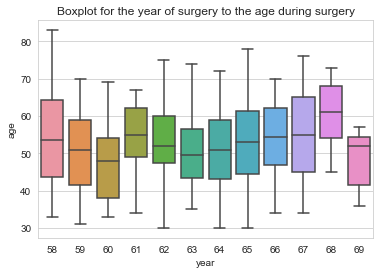

In [74]:
#boxplot
sns.boxplot(x='year',y='age', data=haberman)
plt.title('Boxplot for the year of surgery to the age during surgery')
plt.show()

### OBSERVATIONS:
#### Tells us the corresponding age of the patient based on the year of surgery of the patient.
#### The lower line is 25th percentile,the mid line is the 50th percentile and the top line is the 75th percentile.
#### A Boxplot representation of the year of surgery of the patient based on the age of the patient during the surgery.
#### Every year has a different colorset/format.

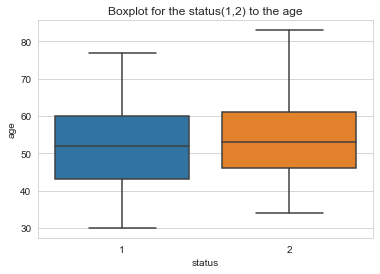

In [75]:
# boxplot
sns.boxplot(x='status',y='age', data=haberman)
plt.title('Boxplot for the status(1,2) to the age')
plt.show()

### OBSERVATIONS:
#### Tells the corresponding age with respect to the status 1(the patient survived 5 years or longer),2.(the patient died within 5 year).
#### The lower line is 25th percentile,the mid line is the 50th percentile and the top line is the 75th percentile.
#### Gives the 25th,50th,and the 75th corresponding value to the status points.

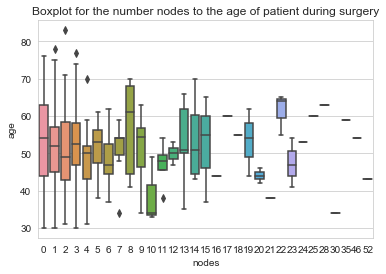

In [76]:
# boxplot
sns.boxplot(x='nodes',y='age', data=haberman)
plt.title('Boxplot for the number nodes to the age of patient during surgery')
plt.show()

### OBSERVATIONS:
#### A boxplot to measure the number of positive axillary nodes based on the year of surgery.
#### The lower line is 25th percentile,the mid line is the 50th percentile and the top line is the 75th percentile.
#### Gives us the corresponding age to the no. of axillary nodes.

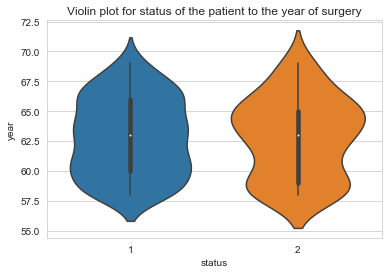

In [77]:
# violin plot

sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.title('Violin plot for status of the patient to the year of surgery')
plt.show()

### OBSERVATIONS:
#### Violin plot  to measure the status of the patient based on the year of surgery.
#### The Blue plot indicates Status 1 i.e., the number of patients who survived for 5 years or longer.
#### and Orange plot indicates Status 2 i.e., the number of patients who died within 5 years.

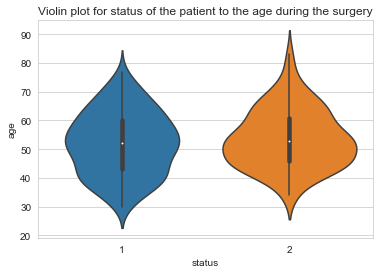

In [78]:
# violin plot

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title('Violin plot for status of the patient to the age during the surgery')
plt.show()

### OBSERVATIONS:

#### Violin plot to measure the status of the patient based on the age during surgery.
#### The Blue plot indicates Status 1  i.e., the number of patients who survived for 5 years or longer during the age of surgery.
#### The Orange plot indicates Status 2  i.e., the number of patients who died within 5 years during the age of surgery.


#  Summary


#### This is Exploratory Data Analysis based on the Haberman Cancer Dataset.
#### In this dataset we're performing an analysis based on the cases from a study that was conducted between the year 1958 and 1970 on the 
#### survival of patients who had undergone surgery for breast cancer based on four attributes: age,year,nodes and status.
####  We've performed an analysis on the Haberman Cancer Dataset based on 4 features:
#### Number of Points,Number of Features,Number of Classes,Data Points per Class.
#### We perform various analysis using PDF,CDF,Boxplot and Violin plots(Univariate),scatter plots and pair plots(Bivariate).
#### We have numerous graphical representations based on different
#### combinations on both axes with all the attributes given in the dataset,which yield us astounding results.
#### Our main aim is to find the number of deaths due to Cancer based on the patient's age during the surgery,year of surgery,
#### on the number of positive axillary nodes and status.
#### In 2D Scatter Plot we saw that we have more no. of patients that survived for 5 years or longer.
####  Pairwise scatter plot we have some overlapping results where we have a lot of patients who survived 5 years or longer and also who died #### within 5 years.
#### In the Violin Plots we have more blue plots indicating Status 1  i.e., the number of patients who survived for 5 years or longer during the age of surgery.
#### Throughout the Analysis we noticed that we have some fluctuating results for all the combinations of attributes of the patients and is not 100% accurate.